<a href="https://colab.research.google.com/github/kmanpreet4651/Data-Analysis-tools/blob/main/AI_1003_Logistic_regression_gradient_desent_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#Load Dataset

from sklearn.datasets import load_breast_cancer

# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

In [4]:
#Show Key Statistics

import pandas as pd

df = pd.DataFrame(data.data, columns=data.feature_names) # create a Pandas DataFrame from the data
df['target'] = data.target # add the target variable to the DataFrame
df.describe() # call the describe() method on the DataFrame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
#Show Key Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [6]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the classifier
clf = LogisticRegression(random_state=42, max_iter=10000)  #
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9824561403508771
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [12]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target variable (labels)

# Add an intercept column to X
X = np.hstack((np.ones((X.shape[0], 1)), X))


In [13]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [14]:
def cost_function(theta, X, y):
    m = len(y)
    predictions = sigmoid(np.dot(X, theta))
    error = (-y * np.log(predictions)) - ((1 - y) * np.log(1 - predictions))
    cost = 1/m * sum(error)
    if not isinstance(cost, np.ndarray):
        cost = np.array([cost])
    gradient = 1/m * np.dot(X.transpose(), (predictions - y))
    return cost[0], gradient

In [15]:
def gradient_descent(X, y, theta, alpha, num_iterations):
    cost_history = []
    for i in range(num_iterations):
        cost, gradient = cost_function(theta, X, y)
        theta -= alpha * gradient
        cost_history.append(cost)
    return theta, cost_history

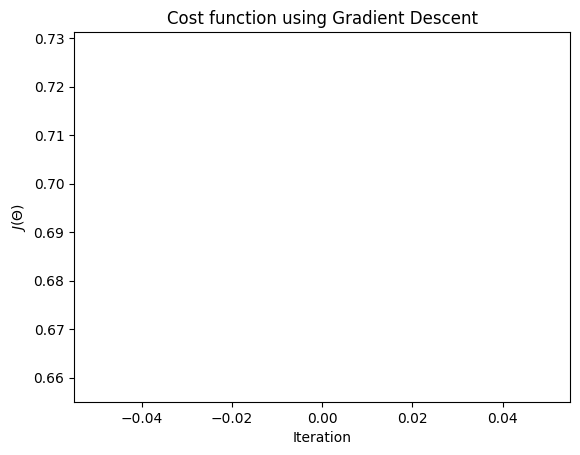

In [17]:
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\\Theta)$")
plt.title("Cost function using Gradient Descent")
plt.show()

In [25]:
# Predict function
def predict(theta, X):
    probability = sigmoid(np.dot(X, theta))
    return [1 if p >= 0.5 else 0 for p in probability]

In [26]:
# Initialize parameters
theta = np.zeros(X.shape[1])  # Initialize theta with zeros
alpha = 0.01  # Learning rate
num_iterations = 1000  # Number of iterations

In [27]:
# Run gradient descent
theta, cost_history = gradient_descent(X, y, theta, alpha, num_iterations)
print(f"Estimated parameters: {theta}")

<ipython-input-13-dc64dee5606b>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-14-0d666c77d0a9>:4: RuntimeWarning: divide by zero encountered in log
  error = (-y * np.log(predictions)) - ((1 - y) * np.log(1 - predictions))
<ipython-input-14-0d666c77d0a9>:4: RuntimeWarning: invalid value encountered in multiply
  error = (-y * np.log(predictions)) - ((1 - y) * np.log(1 - predictions))


Estimated parameters: [ 3.97587608e-01  3.97587608e-01  3.02805626e+00  4.18374940e+00
  1.76345118e+01  7.10430123e+00  2.81558876e-02 -1.14290396e-02
 -5.38945402e-02 -2.30234030e-02  5.36152192e-02  2.23564531e-02
  9.83396324e-03  2.73425127e-01 -9.32737885e-02 -7.81014633e+00
  1.50965689e-03 -3.57524396e-03 -6.73870691e-03 -8.25509184e-04
  4.66261339e-03  3.17966498e-04  3.20479780e+00  5.28056989e+00
  1.79070970e+01 -1.03960887e+01  3.52919425e-02 -5.16224694e-02
 -1.11094644e-01 -2.54650928e-02  7.36139850e-02  2.09189589e-02]


In [30]:
# Make Predictions
def predict(theta, X):
    probability = sigmoid(np.dot(X, theta))
    return [1 if p >= 0.5 else 0 for p in probability]

In [31]:
# Get the predictions using the optimized theta
y_pred = predict(theta, X)

<ipython-input-13-dc64dee5606b>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [32]:
from sklearn.metrics import confusion_matrix

# Calculate the Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[194  18]
 [ 42 315]]


In [24]:
# Generate the classification report
class_report = classification_report(y, y_pred, target_names=data.target_names)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

   malignant       0.82      0.92      0.87       212
      benign       0.95      0.88      0.91       357

    accuracy                           0.89       569
   macro avg       0.88      0.90      0.89       569
weighted avg       0.90      0.89      0.90       569

